In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

print(training_data)
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [3]:
batch_size = 1

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}\n")
    print(X)
    print(y)
    print(y[0].item())
    break


Shape of X [N, C, H, W]: torch.Size([1, 1, 28, 28])
Shape of y: torch.Size([1]) torch.int64

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000

Ankle boot


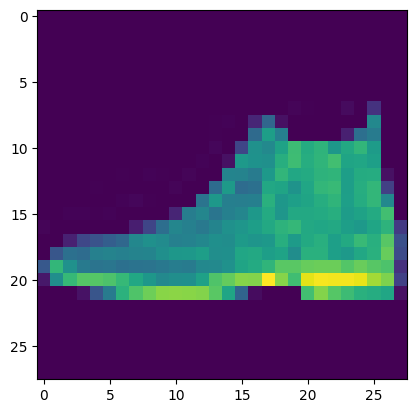

In [4]:
label = classes[y[0].item()]
print(label)
imgplot = plt.imshow(X[0][0])

In [5]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
    

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [6]:
# Get cpu, gpu or mps device for training.

device = ("cuda" if torch.cuda.is_available() 
                 else "mps" if torch.backends.mps.is_available() 
                            else "cpu")

print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [7]:

for name, param in model.named_parameters():
    if param.requires_grad:
        if "linear_relu_stack.4." in name:
            print(name, param.data)

linear_relu_stack.4.weight tensor([[-2.6384e-02,  4.2362e-03,  3.7373e-02,  ...,  2.2984e-02,
         -3.9555e-03,  9.2702e-03],
        [ 7.9518e-03, -2.5618e-02, -3.7630e-03,  ...,  4.1833e-04,
         -2.0180e-02,  4.9629e-03],
        [ 5.0012e-05,  3.6704e-02,  3.4257e-02,  ...,  2.8759e-02,
         -2.2831e-02, -5.9995e-03],
        ...,
        [ 3.4244e-02,  2.9549e-03,  1.2692e-02,  ..., -4.2721e-02,
         -2.2664e-03, -2.1882e-03],
        [ 4.7804e-03, -1.1618e-02,  1.0895e-02,  ...,  2.6183e-03,
          2.8624e-02, -2.0201e-02],
        [-2.7882e-02, -1.6686e-02, -3.5765e-02,  ...,  2.1842e-02,
         -3.1795e-03, -2.6566e-03]])
linear_relu_stack.4.bias tensor([ 0.0357,  0.0194, -0.0334, -0.0296,  0.0029, -0.0049, -0.0164,  0.0112,
        -0.0339,  0.0368])


In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [9]:
def train(dataloader, model, loss_fn, optimizer):
    losses, accuracies = [],[]
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        optimizer.zero_grad()
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        # Nudge
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            accuracy = (torch.sum((torch.argmax(pred, dim=1) == y).type(torch.float))/len(y)).item()
            losses.append(loss)
            accuracies.append(accuracy)
    return losses, accuracies

In [10]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [11]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

epochs = 5
train_losses, train_accuracies = [], []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    losses, accuracies = train(train_dataloader, model, loss_fn, optimizer)
    train_losses.extend(losses)
    train_accuracies.extend(accuracies)
    test(test_dataloader, model, loss_fn)
print("Done!")

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Epoch 1
-------------------------------
loss: 2.301503  [   64/60000]
loss: 2.293263  [ 6464/60000]
loss: 2.266680  [12864/60000]
loss: 2.262524  [19264/60000]
loss: 2.245318  [25664/60000]
loss: 2.210064  [32064/60000]
loss: 2.220441  [38464/60000]
loss: 2.184843  [44864/60000]
loss: 2.178040  [51264/60000]
loss: 2.152464  [57664/60000]
Test Error: 
 Accuracy: 51.6%, Avg loss: 2.140537 

Epoch 2
-------------------------------
loss: 2.149939  [   64/60000]
loss: 2.146469  [ 6464/60000]
loss: 2.076720  [12864/60000]
loss: 2.096073  [19264/60000]
loss: 2.054320  [25664/60000]
loss: 1.982300  [32064/60000]
loss: 2.014970  [38464/60000]
loss: 1.936899  [44864/60000]
loss: 1.938229  [51264/60000]
loss: 1.876613  [57664/60000]
Test Error: 
 Accuracy: 56.8%, Avg loss: 1.862771 

Epoch 3
-------------------------------
loss: 1.899091  [   64/60000]
loss: 1.874201  [ 6464/60000]
loss: 1.743102  [12864

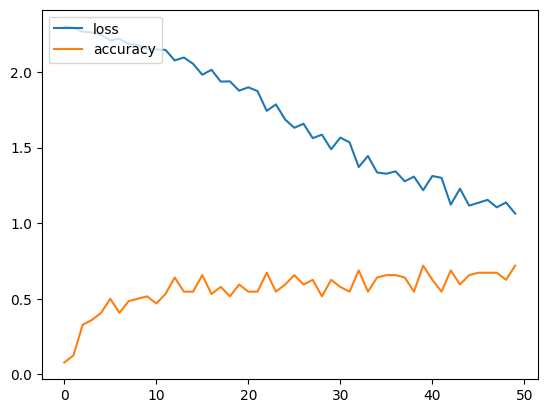

In [24]:
plt.plot(train_losses, label = "loss")
plt.plot(train_accuracies, label = "accuracy")
plt.legend(loc="upper left")

plt.show()

In [13]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [14]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [15]:
X, y = test_data[0]
print(X.shape)
print(y)
test_data.classes[y]
len(test_data)

torch.Size([1, 28, 28])
9


10000

In [16]:
torch.randint(len(test_data),()).item()

5100

Predicted: Sneaker Actual: Sandal


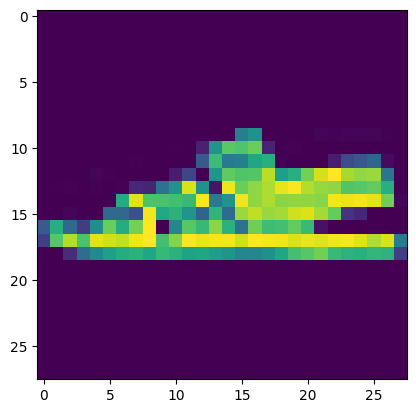

In [17]:
index = torch.randint(len(test_data),()).item()

X, y = test_data[index]
imgplot = plt.imshow(torch.squeeze(X))

model.eval()
with torch.no_grad():
    X = X.to(device)
    pred = model(X)

class_index = torch.squeeze(torch.argmax(pred, dim=1)).item()

test_data.classes[class_index]
print(f"Predicted: {test_data.classes[class_index]} Actual: {test_data.classes[y]}")

In [18]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    model.eval()
    with torch.no_grad():
        X = X.to(device)
        pred = model(X)
    break

pred.shape
(torch.sum((torch.argmax(pred, dim=1) == y).type(torch.float))/len(y)).item()

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


0.609375

In [19]:
y

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])

In [20]:
pred

tensor([[-2.1533, -2.3743, -1.1461, -1.4110, -1.0082,  2.4110, -1.0309,  2.6471,
          1.6351,  3.0332],
        [ 0.8966, -3.4640,  3.8207, -1.1034,  3.3860, -1.9307,  2.8970, -3.5350,
          1.6250, -2.3286],
        [ 2.0939,  4.9700, -0.4718,  3.5316,  0.5507, -2.5586,  0.6511, -3.2166,
         -2.5394, -2.9965],
        [ 1.4611,  3.9662, -0.5475,  2.7792,  0.2307, -1.8047,  0.3246, -2.2987,
         -2.0599, -2.1372],
        [ 1.0843, -1.3007,  1.5365, -0.0598,  1.4371, -1.1456,  1.5181, -2.1510,
          0.5132, -1.4263],
        [ 2.2101,  3.2550,  0.1799,  2.6133,  0.8936, -2.3546,  1.0212, -3.1402,
         -1.8566, -2.7869],
        [ 0.8440, -0.5879,  0.9621, -0.0202,  1.0752, -0.7863,  0.9785, -1.3361,
          0.1532, -1.2642],
        [ 0.4572, -1.2523,  1.6189, -0.2869,  1.7436, -0.9699,  1.3593, -1.8337,
          0.4735, -1.2723],
        [-0.4812, -0.4935, -0.3668, -0.3233, -0.2883,  0.6510, -0.1704,  0.9279,
          0.3344,  0.2124],
        [-1.4759, -